## Shubham Jadhav
## ROLL: 382026

**DL LAB 2**

Facial recognition using OpenCV and deep learning for binary classification.

Problem: Detect the expression on the face of a person. (Smiling/Not Smiling)

In [ ]:
import kagglehub
from pathlib import Path

# Download the dataset
path = kagglehub.dataset_download("owlxiaoliu/four-binary-classification-datasets-of-faces")
print("Dataset downloaded at:", path)

# Confirm the actual full path to Smile and NotSmile
from pathlib import Path
dataset_path = Path(path) / "RealHumanSmile" / "RealHumanSmile"  # <- update here
print("Subfolders in RealHumanSmile:", [f.name for f in dataset_path.iterdir()])

100%|██████████| 4.39G/4.39G [01:05<00:00, 71.9MB/s]

Extracting files...


Dataset downloaded at: /root/.cache/kagglehub/datasets/owlxiaoliu/four-binary-classification-datasets-of-faces/versions/1
Subfolders in RealHumanSmile: ['Smile', 'NotSmile']


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ImageDataGenerator with train-validation split
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Flow training images in batches
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

# Flow validation images in batches
val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 6164 images belonging to 2 classes.
Found 1541 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 85s 413ms/step - accuracy: 0.8405 - loss: 0.4611 - val_accuracy: 0.9624 - val_loss: 0.2382
Epoch 2/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 75s 388ms/step - accuracy: 0.9872 - loss: 0.0484 - val_accuracy: 0.9637 - val_loss: 0.2559
Epoch 3/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 72s 374ms/step - accuracy: 0.9893 - loss: 0.0384 - val_accuracy: 0.9611 - val_loss: 0.2718
Epoch 4/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 72s 372ms/step - accuracy: 0.9878 - loss: 0.0341 - val_accuracy: 0.9643 - val_loss: 0.3400
Epoch 5/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 73s 378ms/step - accuracy: 0.9913 - loss: 0.0218 - val_accuracy: 0.9617 - val_loss: 0.3937
Epoch 6/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 72s 374ms/step - accuracy: 0.9924 - loss: 0.0199 - val_accuracy: 0.9643 - val_loss: 0.7364
Epoch 7/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 72s 375ms/step - accuracy: 0.9949 - loss: 0.0156 - val_accuracy: 0.9643 - val_loss: 0.6591
Epoch 8/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 72s 373ms/step - accuracy: 0.9969 - loss: 0

Saving womansmilephoto.jpeg to womansmilephoto (1).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


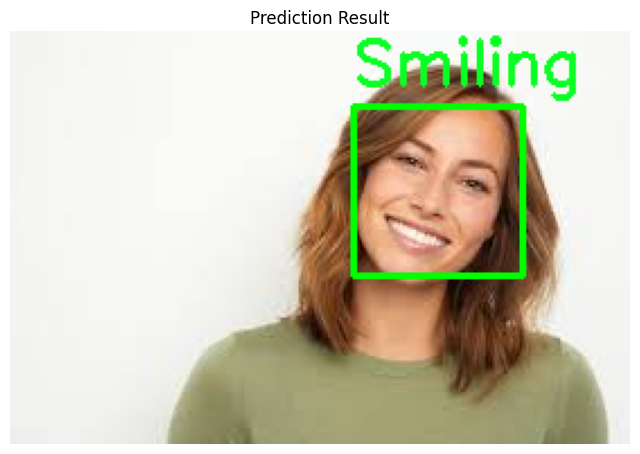

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from PIL import Image
from google.colab import files

# Upload an image (any image with a person)
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Load the image using OpenCV
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Load OpenCV's built-in face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

if len(faces) == 0:
    print("❌ No faces detected.")
else:
    for (x, y, w, h) in faces:
        # Crop the face region
        face = img[y:y+h, x:x+w]

        # Resize to model input size
        face_resized = cv2.resize(face, (150, 150))
        face_array = image.img_to_array(face_resized) / 255.0
        face_array = np.expand_dims(face_array, axis=0)

        # Predict smile or not
        prediction = model.predict(face_array)[0][0]
        label = "Smiling" if prediction > 0.5 else "Not Smiling"

        # Draw rectangle and label on image
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(img, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9,
                    (36, 255, 12), 2)

    # Convert BGR to RGB for display
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(8, 8))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title("Prediction Result")
    plt.show()